In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Loading the dataset

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/data/Real estate.csv'
df = pd.read_csv(file_path)

Displaying the shape of the dataset

In [ ]:
df.shape

(414, 8)

Displaying the columns of the dataset

In [ ]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

Displaying the first five rows of the dataset

In [ ]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Displaying the last five rows of the dataset

In [ ]:
df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


Changing the Date from Numerical vale to date format

In [ ]:
df['X1 transaction date'] = pd.to_datetime(df['X1 transaction date'])
df['X1 transaction date'] = df['X1 transaction date'].dt.date

Checking whether the date format has been converted or not

In [ ]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,1970-01-01,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,1970-01-01,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,1970-01-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,1970-01-01,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,1970-01-01,5.0,390.56840,5,24.97937,121.54245,43.1


As there is no Categorical values,we need not to find the unique values

Check to see if there are any Null Values, If yes then you need to fill them or remove them based on the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    object 
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 26.0+ KB


As there are no null values check to see is there any duplicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
if 'No' in df.columns:
  df = df.drop('No', axis=1)
  print("Column 'No' dropped successfully.")
else:
  print("Column 'No' not found in the DataFrame.")
df.head()

Column 'No' dropped successfully.


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1970-01-01,32.0,84.87882,10,24.98298,121.54024,37.9
1,1970-01-01,19.5,306.59470,9,24.98034,121.53951,42.2
2,1970-01-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,1970-01-01,13.3,561.98450,5,24.98746,121.54391,54.8
4,1970-01-01,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
# prompt: how to add X2 house age, X3 distance to the nearest MRT station, X4 number of convenience stores in tooltip

import plotly.express as px

# Assuming 'df' is your DataFrame and it has columns 'X2 house age', 'X3 distance to the nearest MRT station', and 'X4 number of convenience stores'

fig = px.scatter(df, x="X1 transaction date", y="Y house price of unit area",
                 hover_data=["X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores"])
fig.show()


In [ ]:
# prompt: use X5 latitude    and   X6 longitude and use other values to draw a map using folium

import folium

# Assuming 'df' is your DataFrame with 'X5 latitude' and 'X6 longitude' columns.
# Create a map centered around the mean latitude and longitude
m = folium.Map(location=[df['X5 latitude'].mean(), df['X6 longitude'].mean()], zoom_start=10)

# prompt: use X5 latitude    and   X6 longitude and use other values to draw a map using folium

import folium

# Assuming 'df' is your DataFrame with 'X5 latitude' and 'X6 longitude' columns.
# Create a map centered around the mean latitude and longitude
m = folium.Map(location=[df['X5 latitude'].mean(), df['X6 longitude'].mean()], zoom_start=10)

# Add markers for each location in the DataFrame
for index, row in df.iterrows():
    folium.Marker(
        location=[row['X5 latitude'], row['X6 longitude']],
        popup=f"Latitude: {row['X5 latitude']}, Longitude: {row['X6 longitude']}",  # Customize the popup content as needed
        tooltip=f"Location {row['X2 house age']}, {row['X3 distance to the nearest MRT station']}, {row['X4 number of convenience stores']}"
        # Customize the tooltip content as needed.
    ).add_to(m)


# Display the map
m
import folium

# Assuming 'df' is your DataFrame with 'X5 latitude' and 'X6 longitude' columns.
# Create a map centered around the mean latitude and longitude
m = folium.Map(location=[df['X5 latitude'].mean(), df['X6 longitude'].mean()], zoom_start=10)

# Add markers for each location in the DataFrame
for index, row in df.iterrows():
    folium.Marker(
        location=[row['X5 latitude'], row['X6 longitude']],
        popup=f"Latitude: {row['X5 latitude']}, Longitude: {row['X6 longitude']}",  # Customize the popup content as needed
        tooltip=f"Location {row['X2 house age']}, {row['X3 distance to the nearest MRT station']}, {row['X4 number of convenience stores']}"
        # Customize the tooltip content as needed.
    ).add_to(m)


# Display the map
m


# Display the map
m


Let us describe the dataset and transpose it for easy visualisation

In [ ]:
if 'No' in df.columns:
  df = df.drop('No', axis=1)
  print("Column 'No' dropped successfully.")
else:
  print("Column 'No' not found in the DataFrame.")
df.head()

Column 'No' not found in the DataFrame.


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1970-01-01,32.0,84.87882,10,24.98298,121.54024,37.9
1,1970-01-01,19.5,306.59470,9,24.98034,121.53951,42.2
2,1970-01-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,1970-01-01,13.3,561.98450,5,24.98746,121.54391,54.8
4,1970-01-01,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
numerical_features = ['X2 house age', 'X3 distance to the nearest MRT station',
                      'X4 number of convenience stores', 'X5 latitude',
                      'X6 longitude', 'Y house price of unit area']
z_scores = np.abs(stats.zscore(df[numerical_features]))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_no_outliers = df[~outliers]

In [ ]:
df_no_outliers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X2 house age,407.0,17.638329,11.423157,0.00000,8.90000,16.10000,27.800000,43.80000
X3 distance to the nearest MRT station,407.0,1017.646541,1134.448058,23.38284,289.32480,492.23130,1414.837000,4605.74900
X4 number of convenience stores,407.0,4.149877,2.939395,0.00000,1.00000,4.00000,6.000000,10.00000
X5 latitude,407.0,24.969113,0.012150,24.93207,24.96305,24.97110,24.977705,25.00115
X6 longitude,407.0,121.534069,0.014223,121.49507,121.52981,121.53885,121.543480,121.56627
Y house price of unit area,407.0,38.094349,12.876574,7.60000,28.40000,38.80000,46.600000,78.30000


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'df' is your DataFrame
num_cols = len(df.columns)
fig = make_subplots(rows=1, cols=num_cols, subplot_titles=df.columns)

for i, col in enumerate(df.columns):
    fig.add_trace(go.Box(y=df[col], name=col), row=1, col=i+1)

fig.update_layout(height=600, width=1500, title_text="Outlier Detection for all Columns")
fig.show()

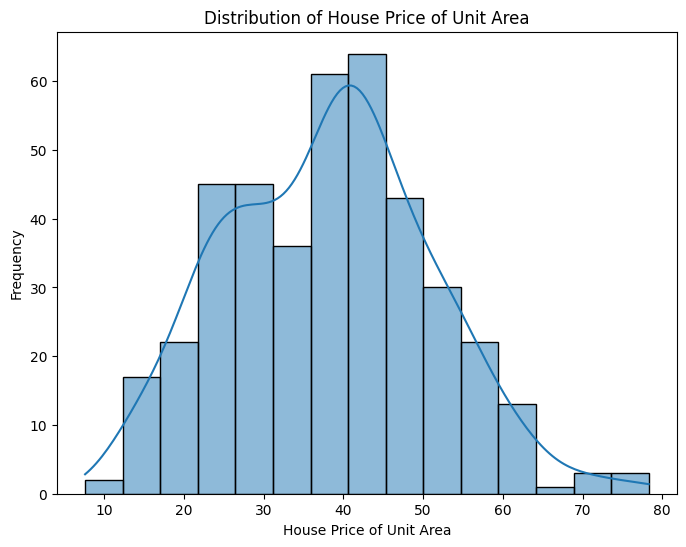

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(df_no_outliers['Y house price of unit area'], kde=True)
plt.title('Distribution of House Price of Unit Area')
plt.xlabel('House Price of Unit Area')
plt.ylabel('Frequency')
plt.show()

As we are using Linear Regression we are going to do standard Scalar and also pickle the file

In [ ]:
df_no_outliers.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1970-01-01,32.0,84.87882,10,24.98298,121.54024,37.9
1,1970-01-01,19.5,306.59470,9,24.98034,121.53951,42.2
2,1970-01-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,1970-01-01,13.3,561.98450,5,24.98746,121.54391,54.8
4,1970-01-01,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df_no_outliers['X1 transaction date'] = df_no_outliers['X1 transaction date'].apply(lambda x: x.toordinal())


<ipython-input-34-6d9f4a6f2f35>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



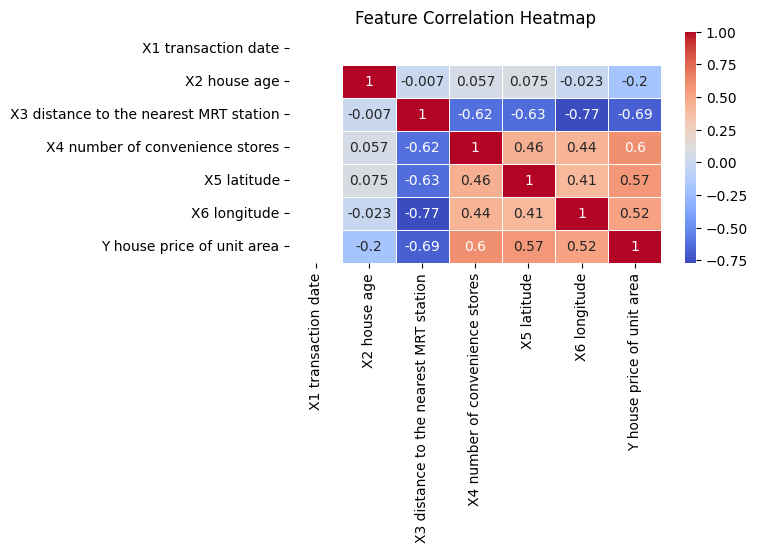

In [ ]:
plt.figure(figsize=(6, 3))
sns.heatmap(df_no_outliers.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X = df_no_outliers.drop(columns=['Y house price of unit area'])
y = df_no_outliers['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
import pickle
with open('real_estate_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!


In [ ]:
with open('real_estate_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)
predictions = loaded_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

In [ ]:
print(f"Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

Model Performance Metrics:
Mean Absolute Error (MAE): 5.73
Mean Squared Error (MSE): 62.96
Root Mean Squared Error (RMSE): 7.93
R-squared (R2): 0.6110


In [ ]:
df_no_outliers.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
new_data = pd.DataFrame({
    'X1 transaction date': [pd.Timestamp('2013-05-14').toordinal()],
    'X2 house age': [10],
    'X3 distance to the nearest MRT station': [2000],
    'X4 number of convenience stores': [5],
    'X5 latitude': [24.98],
    'X6 longitude': [121.54]
})
new_data_scaled = loaded_scaler.transform(new_data)
new_prediction = loaded_model.predict(new_data_scaled)
print(f"Predicted House Price per Unit Area: {new_prediction[0]:.2f}")

Predicted House Price per Unit Area: 38.22
